In [1]:
import pandas as pd
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import torch

In [158]:
df_cat = pd.read_csv('data/animals_data_cat.csv').drop(['Unnamed: 0'], axis = 1)
df_cow = pd.read_csv('data/animals_data_cow.csv').drop(['Unnamed: 0'], axis = 1)
df_dog = pd.read_csv('data/animals_data_dog.csv').drop(['Unnamed: 0'], axis = 1)
df_horse = pd.read_csv('data/animals_data_horse.csv').drop(['Unnamed: 0'], axis = 1)
df_sheep = pd.read_csv('data/animals_data_sheep.csv').drop(['Unnamed: 0'], axis = 1)

In [159]:
df_cat.set_index('id',inplace=True)
df_cow.set_index('id',inplace=True)
df_dog.set_index('id',inplace=True)
df_horse.set_index('id',inplace=True)
df_sheep.set_index('id',inplace=True)

In [160]:
df = pd.concat([df_cat, df_cow, df_dog, df_horse, df_sheep])

In [161]:
df

,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,...,R_B_paw_y,stand,sit,lie,go,run,jump,interact,sleep,eat
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,2,5,296,204,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,20,8,260,286,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,5,11,282,224,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,9,13,274,228,1,...,221,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,25,0,236,220,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0,0,0,0,1,133,39,238,280,0,...,259,1,0,0,0,0,0,0,0,0
963,0,0,0,0,1,33,63,514,496,1,...,418,1,0,0,0,0,0,0,0,0
964,0,0,0,0,1,105,38,460,560,1,...,512,1,0,0,0,0,0,0,0,0


In [162]:
df.to_csv("data/animals_data.csv")

In [163]:
df = pd.read_csv("data/animals_data.csv")

In [166]:
df_dict = df.to_dict()

for column in df.columns:
    if '_x' in column or '_width' in column or '_y' in column or '_height' in column:
        df[column] = df[column].astype(float)

for idx in df_dict['id'].values():
    image = cv2.imread(os.path.join("data/animals", "0"*(3-len(str(idx))) + str(idx) + ".jpeg"))
    y_size, x_size = image.shape[0:2]
    for column in df_dict.keys():
        if '_x' in column or '_width' in column:
            df_dict[column][idx] /= x_size
        elif '_y' in column or '_height' in column:
            df_dict[column][idx] /= y_size

df = pd.DataFrame.from_dict(df_dict)
df.set_index('id',inplace=True)

In [169]:
df

,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,...,R_B_paw_y,stand,sit,lie,go,run,jump,interact,sleep,eat
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0.006667,0.023810,0.986667,0.971429,1,...,0.000000,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0.068729,0.026667,0.893471,0.953333,1,...,0.000000,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0.016667,0.045267,0.940000,0.921811,1,...,0.000000,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0.030000,0.052632,0.913333,0.923077,1,...,0.894737,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0.083333,0.000000,0.786667,0.977778,1,...,0.000000,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0,0,0,0,1,0.268145,0.117825,0.479839,0.845921,0,...,0.782477,1,0,0,0,0,0,0,0,0
963,0,0,0,0,1,0.051562,0.106061,0.803125,0.835017,1,...,0.703704,1,0,0,0,0,0,0,0,0
964,0,0,0,0,1,0.131250,0.063333,0.575000,0.933333,1,...,0.853333,1,0,0,0,0,0,0,0,0


In [2]:
df = pd.read_csv("data/animals_data_p.csv")

In [22]:
df.loc[0][6:-9]

bounds_x         0.006667
bounds_y         0.023810
bounds_width     0.986667
bounds_height    0.971429
L_eye_v          1.000000
                   ...   
L_B_paw_x        0.000000
L_B_paw_y        0.000000
R_B_paw_v        0.000000
R_B_paw_x        0.000000
R_B_paw_y        0.000000
Name: 0, Length: 64, dtype: float64

In [78]:
def show_features(image, data):
    print('cat' * data[0] + 'cow' * data[1] + 'dog' * data[2] + 'horse' * data[3] + 'sheep' * data[4], end = ' ')
    print('stand' * data[-9] + 'sit' * data[-8] + 'lie' * data[-7] + 'go' * data[-6] + 'run' * data[-5] + 'jump' * data[-4] + 'interact' * data[-3] + 'sleep' * data[-2] + 'eat' * data[-1])
    
    plt.figure()
    ax = plt.gca()
    
    plt.imshow(image)
    
    x_size, y_size = image.size
    
    rect = patches.Rectangle((data[5], data[6]),
                             data[7], data[8],
                             linewidth=3, edgecolor='cyan', fill = False)

    ax.add_patch(rect)
    
    for i in range(9, 28):
        v, x, y = data[i], data[2*i+11], data[2*i+12]
        if v == 1:
            plt.scatter(x, y, s=130, marker='.', c='r')

    plt.show()

sheep 


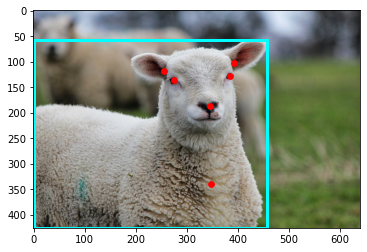

In [80]:
image = Image.open('data/animals/901.jpeg')
data = df.loc[901]
show_features(image, data)

In [2]:
df = pd.read_csv("data/animals_data.csv")

In [3]:
df.set_index('id',inplace=True)

In [81]:
df

,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,...,R_B_paw_y,stand,sit,lie,go,run,jump,interact,sleep,eat
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,2,5,296,204,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,20,8,260,286,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,5,11,282,224,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,9,13,274,228,1,...,221,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,25,0,236,220,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0,0,0,0,1,133,39,238,280,0,...,259,1,0,0,0,0,0,0,0,0
963,0,0,0,0,1,33,63,514,496,1,...,418,1,0,0,0,0,0,0,0,0
964,0,0,0,0,1,105,38,460,560,1,...,512,1,0,0,0,0,0,0,0,0


In [10]:
df = df[['cat', 'cow', 'dog', 'horse', 'sheep', 'bounds_x', 'bounds_y',
       'bounds_width', 'bounds_height', 'L_eye_v', 'R_eye_v', 'L_ear_v',
       'R_ear_v', 'Nose_v', 'Throat_v', 'Tail_v', 'withers_v', 'L_F_elbow_v',
       'R_F_elbow_v', 'L_B_elbow_v', 'R_B_elbow_v', 'L_F_knee_v', 'R_F_knee_v',
       'L_B_knee_v', 'R_B_knee_v', 'L_F_paw_v', 'R_F_paw_v', 'L_B_paw_v',
       'R_B_paw_v', 'L_eye_x', 'L_eye_y', 'R_eye_x', 'R_eye_y', 'L_ear_x', 'L_ear_y',
       'R_ear_x', 'R_ear_y', 'Nose_x', 'Nose_y', 'Throat_x', 'Throat_y', 'Tail_x', 'Tail_y', 'withers_x', 'withers_y', 'L_F_elbow_x',
       'L_F_elbow_y', 'R_F_elbow_x', 'R_F_elbow_y', 'L_B_elbow_x', 'L_B_elbow_y', 'R_B_elbow_x', 'R_B_elbow_y','L_F_knee_x', 'L_F_knee_y','R_F_knee_x',
       'R_F_knee_y','L_B_knee_x', 'L_B_knee_y','R_B_knee_x','R_B_knee_y', 'L_F_paw_x', 'L_F_paw_y','R_F_paw_x', 'R_F_paw_y','L_B_paw_x','L_B_paw_y',
       'R_B_paw_x', 'R_B_paw_y', 'stand', 'sit', 'lie', 'go', 'run', 'jump', 'interact',
       'sleep', 'eat']]

In [11]:
df.columns

Index(['cat', 'cow', 'dog', 'horse', 'sheep', 'bounds_x', 'bounds_y',
       'bounds_width', 'bounds_height', 'L_eye_v', 'R_eye_v', 'L_ear_v',
       'R_ear_v', 'Nose_v', 'Throat_v', 'Tail_v', 'withers_v', 'L_F_elbow_v',
       'R_F_elbow_v', 'L_B_elbow_v', 'R_B_elbow_v', 'L_F_knee_v', 'R_F_knee_v',
       'L_B_knee_v', 'R_B_knee_v', 'L_F_paw_v', 'R_F_paw_v', 'L_B_paw_v',
       'R_B_paw_v', 'L_eye_x', 'L_eye_y', 'R_eye_x', 'R_eye_y', 'L_ear_x',
       'L_ear_y', 'R_ear_x', 'R_ear_y', 'Nose_x', 'Nose_y', 'Throat_x',
       'Throat_y', 'Tail_x', 'Tail_y', 'withers_x', 'withers_y', 'L_F_elbow_x',
       'L_F_elbow_y', 'R_F_elbow_x', 'R_F_elbow_y', 'L_B_elbow_x',
       'L_B_elbow_y', 'R_B_elbow_x', 'R_B_elbow_y', 'L_F_knee_x', 'L_F_knee_y',
       'R_F_knee_x', 'R_F_knee_y', 'L_B_knee_x', 'L_B_knee_y', 'R_B_knee_x',
       'R_B_knee_y', 'L_F_paw_x', 'L_F_paw_y', 'R_F_paw_x', 'R_F_paw_y',
       'L_B_paw_x', 'L_B_paw_y', 'R_B_paw_x', 'R_B_paw_y', 'stand', 'sit',
       'lie', 'go', 'run',

In [82]:
df.to_csv("data/animals_data_m.csv")

In [2]:
df = pd.read_csv("data/animals_data_p.csv")

In [9]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [10]:
df.set_index('id',inplace=True)

In [8]:
df['bounds_x'] = df['bounds_x'] + df['bounds_width'] // 2
df['bounds_y'] = df['bounds_y'] + df['bounds_height'] // 2

In [11]:
df

,cat,cow,dog,horse,sheep,bounds_x,bounds_y,bounds_width,bounds_height,L_eye_v,...,R_B_paw_y,stand,sit,lie,go,run,jump,interact,sleep,eat
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,150,107,296,204,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,150,151,260,286,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,146,123,282,224,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,146,127,274,228,1,...,221,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,143,110,236,220,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0,0,0,0,1,252,179,238,280,0,...,259,1,0,0,0,0,0,0,0,0
963,0,0,0,0,1,290,311,514,496,1,...,418,1,0,0,0,0,0,0,0,0
964,0,0,0,0,1,335,318,460,560,1,...,512,1,0,0,0,0,0,0,0,0


In [12]:
df.to_csv("data/animals_data_p.csv")

In [2]:
target_size = (256, 256)
animal_classes = ['cat', 'cow', 'dog', 'horse', 'sheep']

label = 'dog'

bbox = np.array([ 40.410633, 31.1445, 213.92258, 216.60512])
keypoints = np.array([[201.30061, 64.87915, 1.],
                   [185.643, 65.51867, 1.],
                   [205.13515, 55.286358, 1.],
                   [180.21077, 57.844433, 1.],
                   [192.67296, 94.297035, 1.],
                   [189.15799, 111.2443, 1.],
                   [ 86.90417, 48.251644, 1.],
                   [161.67728, 60.082752, 1.],
                   [184.36484, 136.18555, 1.],
                   [166.47043, 137.4646, 1.],
                   [109.591736, 114.76166, 1.],
                   [105.437675, 113.48263, 1.],
                   [183.08667, 178.39383, 1.],
                   [169.3463, 177.43457, 1.],
                   [95.53184, 153.77234, 1.],
                   [94.89275, 153.77234, 1.],
                   [185.32347, 208.45125, 1.],
                   [184.0453, 209.41054, 1.],
                   [111.508995, 206.53268, 1.],
                   [111.508995, 206.85246, 1.]])

In [7]:
list_features = list(bbox)

for keypoint in keypoints:
    list_features.append(keypoint[2])
    list_features.append(keypoint[0])
    list_features.append(keypoint[1])

list_features.append(animal_classes.index(label))

In [8]:
list_features

[40.410633,
 31.1445,
 213.92258,
 216.60512,
 1.0,
 201.30061,
 64.87915,
 1.0,
 185.643,
 65.51867,
 1.0,
 205.13515,
 55.286358,
 1.0,
 180.21077,
 57.844433,
 1.0,
 192.67296,
 94.297035,
 1.0,
 189.15799,
 111.2443,
 1.0,
 86.90417,
 48.251644,
 1.0,
 161.67728,
 60.082752,
 1.0,
 184.36484,
 136.18555,
 1.0,
 166.47043,
 137.4646,
 1.0,
 109.591736,
 114.76166,
 1.0,
 105.437675,
 113.48263,
 1.0,
 183.08667,
 178.39383,
 1.0,
 169.3463,
 177.43457,
 1.0,
 95.53184,
 153.77234,
 1.0,
 94.89275,
 153.77234,
 1.0,
 185.32347,
 208.45125,
 1.0,
 184.0453,
 209.41054,
 1.0,
 111.508995,
 206.53268,
 1.0,
 111.508995,
 206.85246,
 2]